In [1]:
import numpy as np
from preprocess_util import *
from visualization_util import *
from model import *
wave = augment(np.load("data/angle_wave.npy"))
not_wave = augment(np.load("data/angle_not_wave.npy"))


In [2]:
print(wave.shape,not_wave.shape)

(5184, 4, 120) (5200, 4, 120)


In [3]:
X = np.array( list(wave) + list(not_wave) )

In [4]:
y = np.zeros((wave.shape[0] + not_wave.shape[0]))
y[:wave.shape[0]] = 1
np.save('data/features.npy',X)
np.save('data/target.npy',y)

In [5]:
model = createModel()

In [6]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 120, 4)]     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 120, 128)     5248        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 120, 128)     512         conv1d_1[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 120, 128)     0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
X = X.swapaxes(1,2)

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
y_train = keras.utils.to_categorical(y_train, num_classes=2, dtype='float32')
y_valid = keras.utils.to_categorical(y_valid, num_classes=2, dtype='float32')

In [9]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
history = model.fit(x_train,y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs= 50)

Epoch 1/50
208/208 [==============================] - 18s 87ms/step - loss: 0.4794 - accuracy: 0.8474 - val_loss: 0.4436 - val_accuracy: 0.8279
Epoch 2/50
208/208 [==============================] - 18s 87ms/step - loss: 0.3010 - accuracy: 0.8810 - val_loss: 0.4873 - val_accuracy: 0.7545
Epoch 3/50
208/208 [==============================] - 18s 87ms/step - loss: 0.2618 - accuracy: 0.8909 - val_loss: 0.2363 - val_accuracy: 0.9013
Epoch 4/50
208/208 [==============================] - 18s 87ms/step - loss: 0.2398 - accuracy: 0.9029 - val_loss: 0.1676 - val_accuracy: 0.9326
Epoch 5/50
208/208 [==============================] - 18s 87ms/step - loss: 0.2019 - accuracy: 0.9199 - val_loss: 0.1901 - val_accuracy: 0.9230
Epoch 6/50
208/208 [==============================] - 18s 87ms/step - loss: 0.1900 - accuracy: 0.9248 - val_loss: 0.1385 - val_accuracy: 0.9458
Epoch 7/50
208/208 [==============================] - 19s 89ms/step - loss: 0.1757 - accuracy: 0.9309 - val_loss: 0.2995 - val_accuracy:

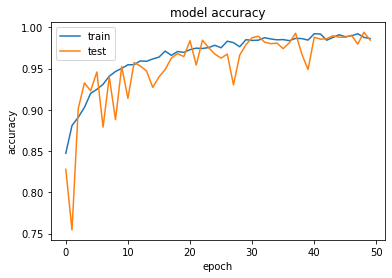

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('model/final.h5')

(<Figure size 648x648 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

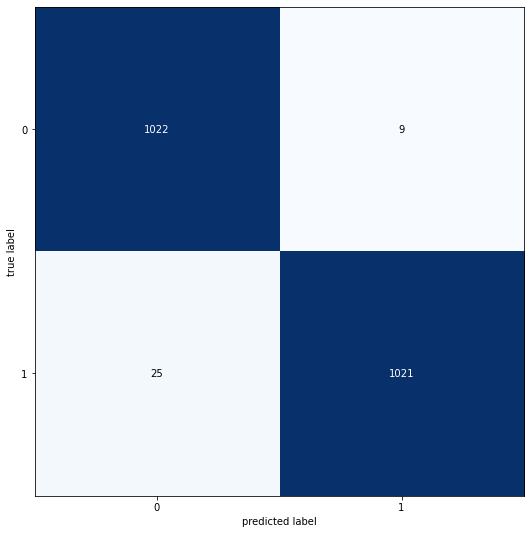

In [12]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = mat, show_normed = False, figsize = (9,9))